<a href="https://colab.research.google.com/github/njy-mbc/Python25Study/blob/main/07_03_%EC%9D%B8%EA%B3%B5%EC%8B%A0%EA%B2%BD%EB%A7%9D%EA%B8%B0%ED%83%80%EB%8F%84%EA%B5%AC(%EB%93%9C%EB%A1%AD%EC%95%84%EC%9B%83%2C%EC%BD%9C%EB%B0%B1%2C%EC%A1%B0%EA%B8%B0%EC%A2%85%EB%A3%8C).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# 인공신경망을 구성하는 절차
# 1. 더미데이터 준비
# 2. 훈련용, 검증용, 테스트용으로 나눔
# 3. 심층을 만듦(dense)
# 4. model에 적용
# 5. 컴파일 진행(최적화 기법 : adam)
# 6, fit
# 7. evaluate(검증)

In [13]:
# 손실곡선 : fit()매서드로 모델을 훈련하는 동안 훈련과정이
# 상세하게 출려되어 확인 할 수 있다(에포크 횟수, 손실, 정확도)
# 아래쪽에 이 출력 메세지가 나옴

# fit()매서드는 History라는 클래스 객체를 반환(훈련괒어의 지표, 손실, 정확도 등 내장)

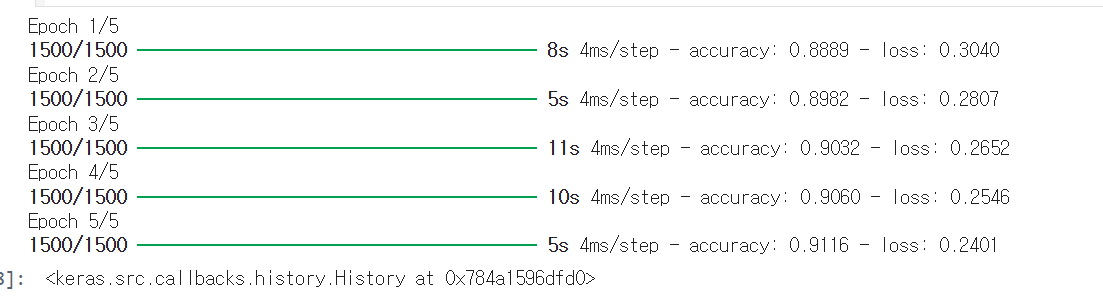

In [14]:
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input /255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size = 0.2, random_state = 42
)

In [15]:
print("훈련데이터 : ")
print(train_scaled.shape, train_target.shape)
print("테스트 데이터 : ")
print(test_input.shape, test_target.shape)
print("검증 데이터 : ")
print(val_scaled.shape, val_target.shape)

훈련데이터 : 
(48000, 28, 28) (48000,)
테스트 데이터 : 
(10000, 28, 28) (10000,)
검증 데이터 : 
(12000, 28, 28) (12000,)


In [17]:
# 모델을 만드는 함수를 정의 (하나의 매개변수를 바아 리턴), model_fn(dense를 추가하여 생성)
def model_fn(a_layer = None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape = (28,28)))  # 반복적으로 사용되는 입력층
  model.add(keras.layers.Dense(100, activation='relu'))   # 반복적으로 사용되는 2진분류 층

  # model_fn() 함수에 (a_layer 매개변수로) 케라스 측을 추가하면 은닉층 뒤에 하나의 층을 추가
  if a_layer:
    model.add(a_layer)                                    # 매개값으로 넘어오는 추가되는 층
  model.add(keras.layers.Dense(10, activation='softmax'))  # 반복적으로 사용되는 다중분류 층
  return model

In [18]:
model = model_fn()  # 위에서 만든 매서드 호출 하여 모델에 담음
# model_fn(매개값이 없으면 그냥 생성, 있으면 모델 추가용)
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#                   다중분류                                  정확도

In [21]:
# fit()매서드의 결과를 history 변수에 담아 봄
history = model.fit(train_scaled, train_target, epochs=5, verbose=2)
#                                                         훈련과정 출력을 조절 함
#                           verbose=0 훈련과정을 나타내지 않음
#                           verbose=1 기본값, 에포크마다 진행 막대와 함께 손실등의 지표가 출력
#                           verbose=2 진행막대 빼고 출력

Epoch 1/5
1500/1500 - 6s - 4ms/step - accuracy: 0.8112 - loss: 0.5311
Epoch 2/5
1500/1500 - 4s - 3ms/step - accuracy: 0.8586 - loss: 0.3903
Epoch 3/5
1500/1500 - 5s - 3ms/step - accuracy: 0.8729 - loss: 0.3523
Epoch 4/5
1500/1500 - 4s - 3ms/step - accuracy: 0.8810 - loss: 0.3306
Epoch 5/5
1500/1500 - 5s - 3ms/step - accuracy: 0.8873 - loss: 0.3141


In [22]:
print(history)  # 위에 fit한 결과를 History객체가 가지고 있는데 이것을 history 변수에 담음

In [23]:
print(history.history.keys())
# 훈련 측정 값이 담겨 있는 history 딕셔너리가 존재함
# 정확도 accuracy, 손실 loss값이 있다

# 정확도는 compile() 매서드의 metrics매개 변수에 accuracy를 추가 했기 때문에
# history 속성에 포하되어 있음

dict_keys(['accuracy', 'loss'])


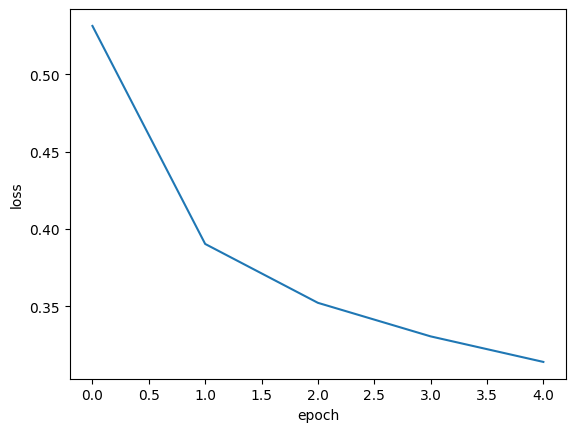

In [24]:
import matplotlib.pyplot as plt
# history속성에 포함된 손실과 정확도는 에포크마다 계산한 값이
# 순서대로 나열된 단순한 리스트로 매트플롯립으로 쉽게 그래프 처리가 가능
plt.plot(history.history['loss']) # 손실률을 차트로 표시
plt.xlabel('epoch')
# 파이썬 인덱스는 0부터 5개의 에포크가 0 ~ 4까지 x축에 표현
plt.ylabel('loss')
plt.show()

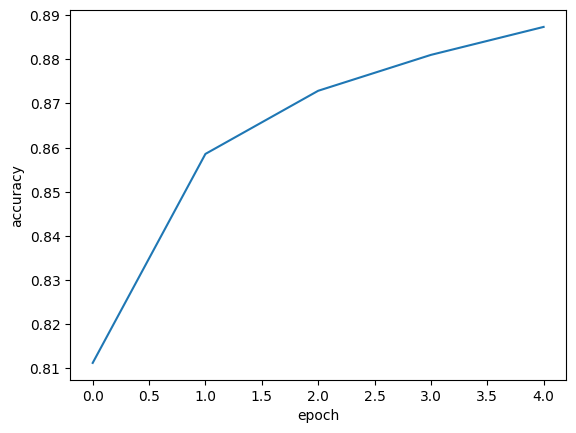

In [25]:
# 이번에는 정확도를 출력
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [29]:
# 이번에는 에포크 횟수를 20번으로 늘림
model = model_fn()  # 위에서 만든 메서드로 모델 생성(3개층 입력층, 은닉층, 출력층)
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0) # 1분정도 걸림

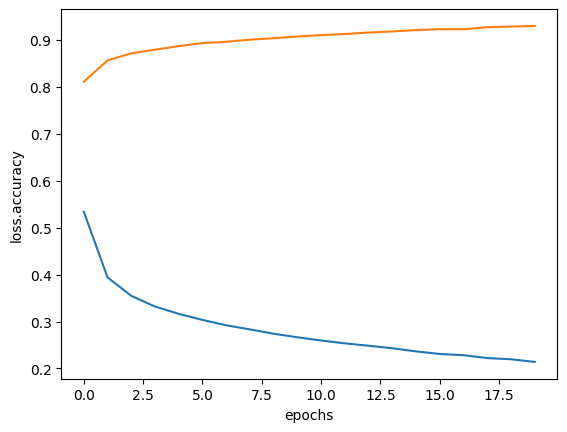

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('loss.accuracy')
plt.show()

In [ ]:
# 검증 손실 validation_data = (val_scaled, val_target)
# 이전에 확률적 셩사 하강법을 사용했을때 과대/과소 적합과 에포크 사이에 관계 부분이 있었다

# 에포크에 따른 과대적합, 과소적합을 파악하려면 훈련 세트 점수와 검증 세트에 대한 점수도 필요함
# 검증 손실을 이용해 과대/과서 적합을 응용하겠다

# keypoint https://wikidocs.net/236194
# 손실을 사용하는것과 정확도를 사용하는 것의 차이는?
# 인공 신경망 모델이 최적화하는 대상은 정확도가 아니라 손실함수
# 손실 감소에 비례해 정확도가 높아지지 않는 경우도 있다
# 모델이 잘 훈련되었는지 판단하려면 정확도 보다는 손실 함수의 값을 확인 하는 것이 더 좋은 방법

In [31]:
model = model_fn()
model.summary()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=1,
                    validation_data=(val_scaled, val_target))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7637 - loss: 0.6723 - val_accuracy: 0.8473 - val_loss: 0.4305
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8518 - loss: 0.4061 - val_accuracy: 0.8569 - val_loss: 0.3989
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8691 - loss: 0.3596 - val_accuracy: 0.8613 - val_loss: 0.3856
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8801 - loss: 0.3348 - val_accuracy: 0.8627 - val_loss: 0.3884
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8861 - loss: 0.3174 - val_accuracy: 0.8674 - val_loss: 0.3788
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8916 - loss: 0.3045 - val_accuracy: 0.8651 - val_loss: 0.3914
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8985 - loss: 0.2929 - val_accuracy: 0.8648 - val_loss: 0.4089
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9017 - loss: 0.2839 -

In [34]:
print(history.history.keys())
# 정확도 accuracy, loss 값이 있다
# 추가로 검증세트 정확도 val_accuracy, 검증세트 손실 val_loss가 나옴

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


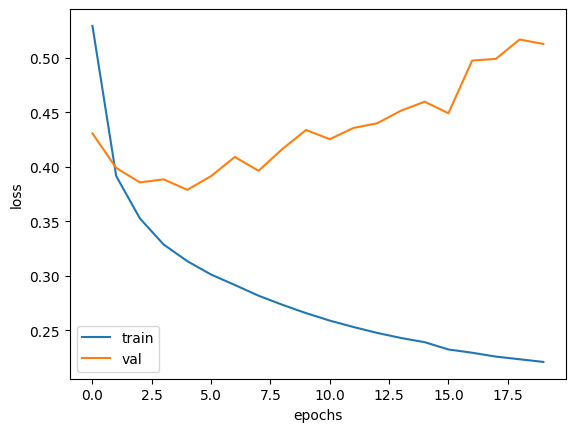

In [35]:
# 과대/과소 적합 문제를 조사하기 위해서 훈련손실, 검증 손실을 한 그래프에 그려서 비교하자
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# 결과 분석 : 초기에 검증 손실이 감소하다가 다섯 번째 에포크 만에 다시 상승함
# 훈련 손실은 꾸준히 감소하기 때문에 과대 적합 모델이 만들어 짐
# 검증 손실이 상승하는 시점을 가능한 늦추면 세트에 대한 손실이 줄어들고
# 검증 세트에 대한 정확도가 증가할 거 같다.

# 과대 적합을 막기 위한 방법으로 예전에 사용했던 규제방식대신에
# 신경망에 특화된 규제방법(드롭아웃)을 나중에 해보자.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


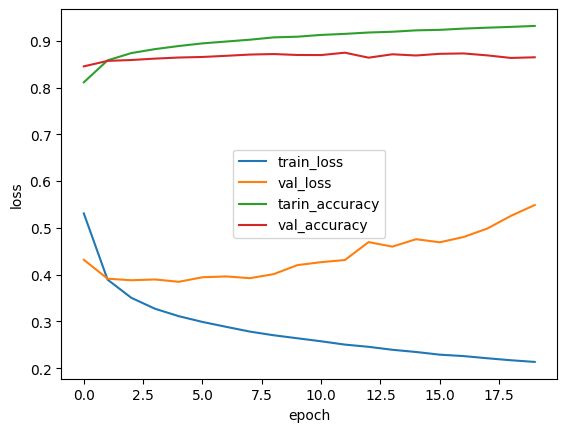

In [39]:
# 지금은 옵티마이져(최적화) 하이퍼파라미터를 자동 조절하여 과대 적합을 완화시켜본다.
# RMSprop 옵티마이져는 많은 문제에서 잘~ 동작합니다. -> 다른 방법으로는 Adagrad, Adam 등이 있음
model = model_fn()
model.compile(optimizer='RMSprop', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss','tarin_accuracy', 'val_accuracy'])
plt.show()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


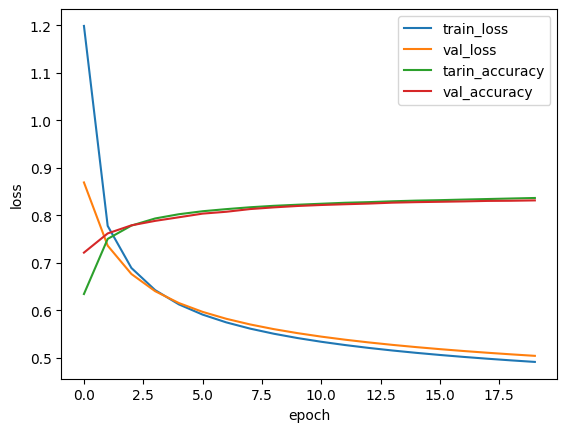

In [40]:
model = model_fn()
adagrad = keras.optimizers.Adagrad()
model.compile(optimizer=adagrad, loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss','tarin_accuracy', 'val_accuracy'])
plt.show()

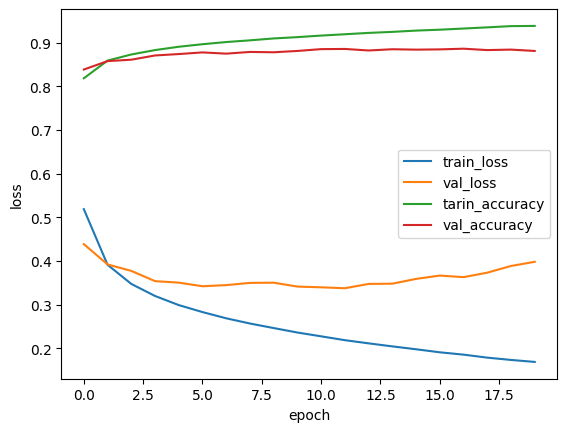

In [42]:
model = model_fn()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))   # 2분 25초 걸림

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss','tarin_accuracy', 'val_accuracy'])
plt.show()
# 3가지의 최적화 기법을 사용해보니 adam이 안정적으로 보인다.
# 대신 과대적합을 막기위한 기법이 필요해 보인다.

In [ ]:
# 드롭 아웃(Dropout)은 딥러닝의 기초가 되는 제프리 힌턴이 소개
# 훈련과정에서 층에 있는 일부 뉴런을 랜덤하게 꺼서(뉴런 출력을 0으로 만듦), 과대적합을 막음

# 어떤 샘플을 처리할 때 은닉층의 두번째 뉴런이 드롭아웃되어 h2 출력이 없음
# 다른 샘플을 처리할 때는 은닉층의 첫번째 뉴런이 드롭아웃 되어 h1 출력이 없음
# 뉴런은 랜덤하게 드롭아웃되고 얼마나 많은 뉴런을 드롭아웃할지는 우리가 정함

# 드롭 아웃이 왜 과대적합을 막을 수 있는가를 생각해 보면 이전 층의 일부 뉴런이 랜덤하게 꺼지면
# 특정 뉴런이 과대하게 의존하는 것을 줄일 수 있고 모든 입력에 대해 주의를 기울여야함
# 일부 뉴런의 출력이 없을 수 있다는 것을 감안하면 이 신경망은 더 안정적인 예측을 할 수 있는것

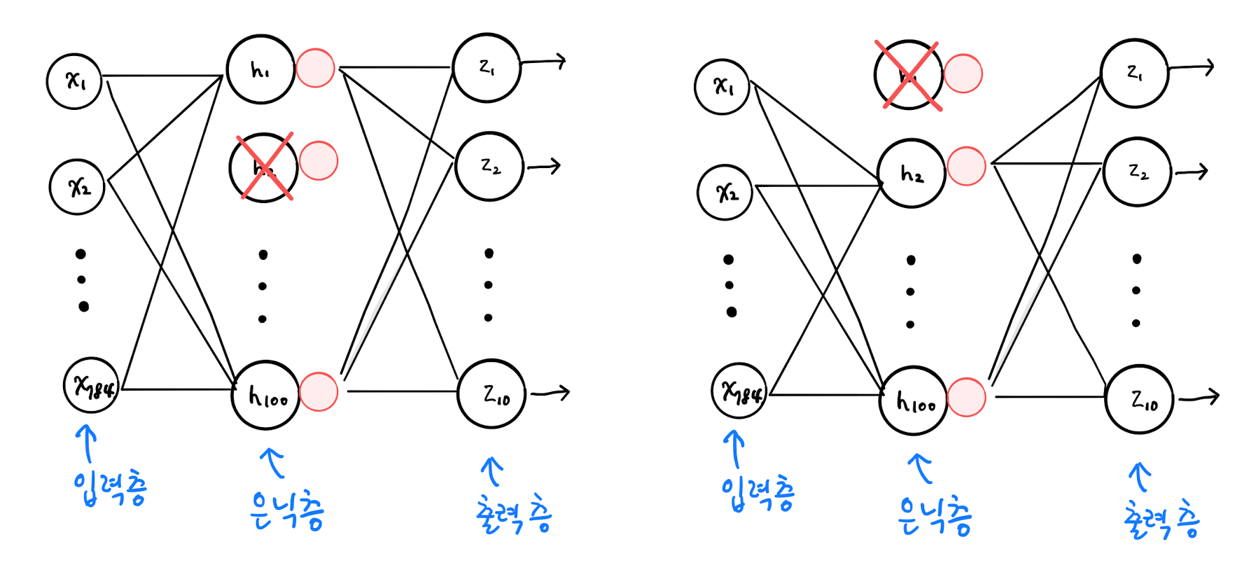

In [44]:
# 또 다른 분석
# 앞의 드옵아웃이 적용된 2개의 신경망 그림을 보면
# 드롭아웃을 적용해 훈련하는 것은 마치 2개의 신경망을 앙상블하는 것처럼 상상하게 됨
# 앙상블 : 다 좋은 예측을 만들기 위해 여러개의 모델을 훈련하는 머신러닝 알고리즘

# 케라스에서 드롭아웃을 keras.layers.Dropout로 제공함
# 어떤 층의 뒤에 드롭아웃을 두어 이층의 출력을 랜덤하게 0으로 만듦
# 드롭아웃이 층처럼 사용되지만 훈련되는 파라미터는 없음

# model_fn 함수에 드롭아웃 객체를 전달하여 층을 추가함
model = model_fn(keras.layers.Dropout(0,3)) # 30% 정도 드롭 아웃
model.summary()
# 은닉층 뒤에 추가된 드롭아웃 층(3번째 값)은 훈련되는 모델 파라미터가 없음
# 입력과 출력의 크기가 같음
# 일부 뉴런의 출력을 0으로 만들지만 전체 출력 배열의 크기를 바꾸지는 않음.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_11 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

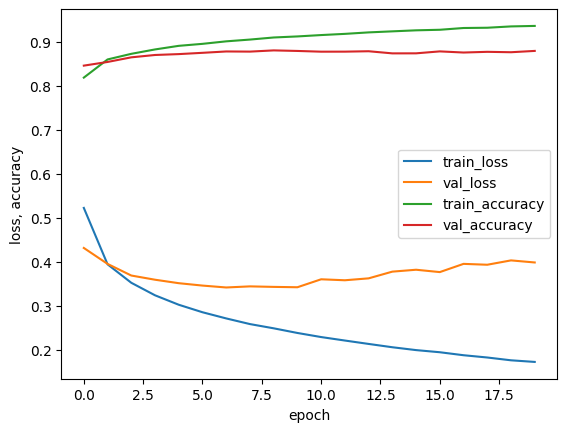

In [45]:
# 주의사항 : 훈련이 끝난 뒤 평가나 예측을 수행할 때는 드롭아웃을 적용하지 않는다
# 훈련된 모든 뉴련을 사용해야 올바른 예측이 수행됨
# 텐서플로와 케라스는 모델을 평가와 예측에 사용할 때 자동으로 드롭아웃을 적용하지 않음

#훈련 손실과 검증 손실 그래프를 그려보자
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss, accuracy')
plt.legend(['train_loss', 'val_loss','train_accuracy', 'val_accuracy'])
plt.show()
# 과대 적합이 확실이 줄어 듬 10번째 에포크가 검증 손실의 감소가 멈추지만 크게 상승하지 않음
# 20번의 에포크를 실행해서 결국 과대 적합이 되었음 -> 10번만 해보까??? (조기종료에서 해보자.)

In [49]:
# 차후에 활용하기 위해 모델 저장과 복원을 시도
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=10, verbose=0,
                    validation_data=(val_scaled, val_target))

model.save('model-whole-ep10.keras') # 모델 저장

# 케라스 모델은 훈련된 모델의 파라미터를 저장하는 save_weights() 메서드가 있다.
# 텐서플로의 체크포인트 포멧으로 저장하지만 https://www.tensorflow.org/guide/checkpoint?hl=ko
# .h5일 경우 HDF5 포멧으로 저장함 https://geunuk.tistory.com/466

model.save_weights('model-ep10.weights.h5') # HDF5 형식으로도 저장됨 (폴더에서 확인)

In [50]:
# 모델 불러오기 테스트
!ls -al model*

-rw-r--r-- 1 root root 976600 Nov 13 02:28 model-ep10.weights.h5
-rw-r--r-- 1 root root 979412 Nov 13 02:28 model-whole-ep10.keras


In [51]:
# 실험1
# 훈련하지 않은 새로운 모델을 만들고 model-ep10.weights.h5 파일에서
# 훈련된 모델 파라미터를 읽어서 사용

# model_fn()
model = model_fn(keras.layers.Dropout(0.3)) # 훈련되지 않은 새로운 모델

model.load_weights('model-ep10.weights.h5') # 이전에 저장했던 모델 파라미터를 로딩
# 이때 사용하는 매서드는 save_weight()와 쌍을 이루는 load_weight()
# 주의사항 : load_weights()를 사용하려면 save_weight()로 저장했던 모델과 정확히 같은 구조를 가져야함
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_15 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
# 모델의 검증 정확도를 확인해보자
import numpy as np

# predict() 매서드는 사이킷런과 다른 샘플들마다 10개의 클래스에 대한 확률을 반환(다중분류)

# 패션 MNIST데이터셋에서 덜어낸 검증 세트의 샘플수는 12,000개이기 떄문에
# predict()매서드는 (12000,10)크기의 배열을 반환
# 10개의 확률 주 가장 큰 값의 인덱스를 골라(.argmax) 타겟 레이블과 비교하여 정확도를 계산해보자
val_labels = np.argmax(model.predict(val_scaled), axis=-1)

# axis = -1 배열의 마지막 차원을 따라 최대값을 고름
# 검증세트는 2차원 배열이기 때문에 마지막 차원은 1이 됨
# 예를 들어 아래 그림처럼 5 * 3 배열에 axis = 1로 한값과 axis = 0으로 한 값의 인덱스를 반환함

# argmax()로 고른 인덱스(val_labels)와 타겟(val_target)을 비교하여 같으면 1이 되고 다르면 0이됨
# 이를 평균으로 출력해봄(정확도)
print(np.mean(val_labels == val_target))  # 87.96

# axis=1 이면 열을 따라 각 행의 최대값 인덱스
# axis=0 이면 행을 따라 각 열의 최대값 인덱스
# 그 다음 라인은 argmax()로 고른 인덱스(val_labels)와 타겟(val_target)을 비교
# => 두 배열에서 각 위치의 값이 같으면 1, 다르면 0 (평균하면 정확도가 됨)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
0.8783333333333333


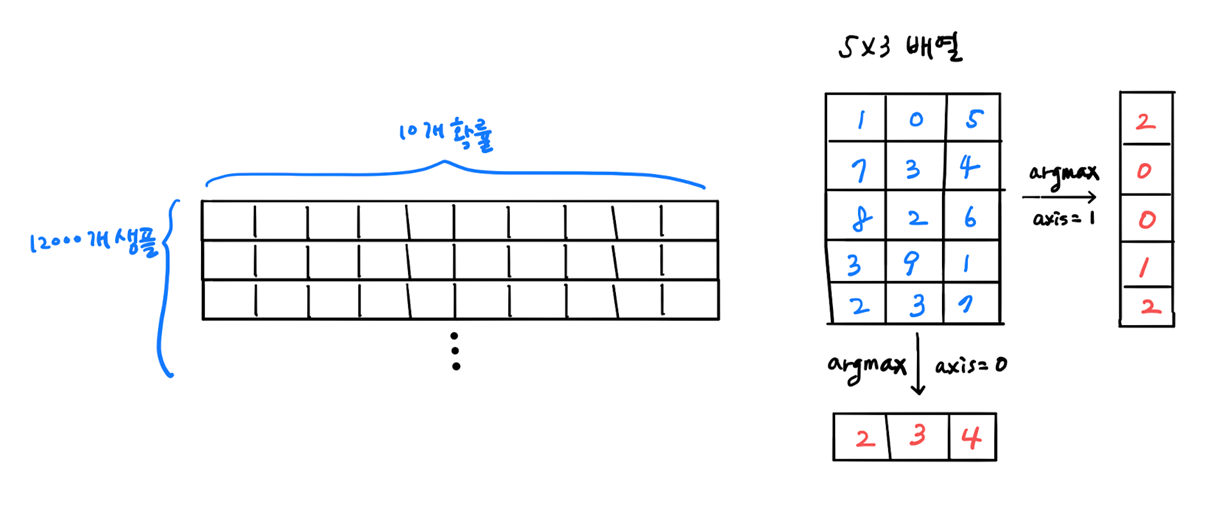

In [56]:
# 실험2
# 아예 파일로 새로운 모델을 만들고 실행해 보자
# 추가적으로 콜백을 사용해 보자
# 콜백 :훈련과정 중간에 어떤 작업을 수행할 수 있게 하는 객체, 케라스, 콜백 패키지가 있다
# fit()매서드의 callback 매개변수에 리스트로 전달하여 사용
# 지금 우리가 사용할 콜백은 ModelCheckpoint 콜백으로 에포크마다 모델을 지정함
# save_best_only = True, 매개변수를 지정해 가장 낮은 검증 점수를 만드는 모델을 지정할 수 있다

model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras',
                                                save_best_only=True)

model.fit(train_scaled, train_target, epochs=20, verbose=1,
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])
# 모델 훈련 후 best-model.keras에 최상의 검증 점수를 낸 모델이 저장됨

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7289 - loss: 0.7833 - val_accuracy: 0.8432 - val_loss: 0.4291
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8342 - loss: 0.4580 - val_accuracy: 0.8545 - val_loss: 0.3899
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8524 - loss: 0.4092 - val_accuracy: 0.8590 - val_loss: 0.3785
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8601 - loss: 0.3892 - val_accuracy: 0.8676 - val_loss: 0.3582
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8650 - loss: 0.3723 - val_accuracy: 0.8733 - val_loss: 0.3419
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8691 - loss: 0.3579 - val_accuracy: 0.8753 - val_loss: 0.3395
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8745 - loss: 0.3483 - val_accuracy: 0.8757 - val_loss: 0.3371
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8782 - loss: 0.3372 - 

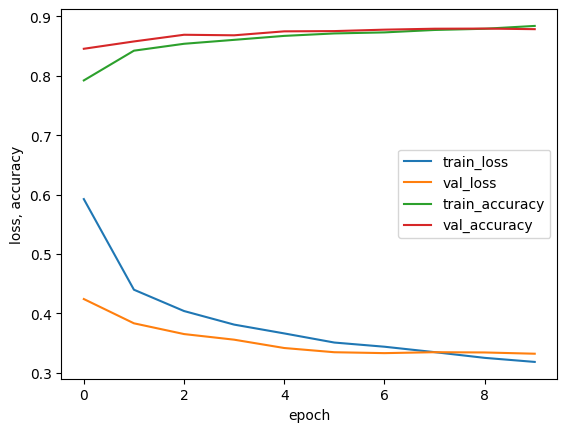

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8169 - loss: 0.5429


[0.549809992313385, 0.8118333220481873]

In [58]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss, accuracy')
plt.legend(['train_loss', 'val_loss','train_accuracy', 'val_accuracy'])
plt.show()
model.evaluate(val_scaled, val_target) # 검증세트의 성능 확인 (33.10%, 87.99%) 에포크 9번
# 결론 20번을 다 돌리고 좋은 점수가 나온 9번째 에포크를 저장함.

In [ ]:
# keras.callbacks.ModelCheckpoint 콜백이 가장 낮은 검증 점수의 모델을 자동으로 저장해 주었음
# 여전히 20번의 에포크 동안 훈련을 함
# 사실 검증 점수가 상승하기 시작하면 그 이후에는 과대 적합이
# 더 커지기 때문에 훈련을 계속할 필요가 없음.
# 이때 훈련을 종료하면 자원과 시간일 아낄 수 있음 -> 조기종료(early stopping)

# 조기 종료는 딥러닝 분야에 많이 사용하는 기법
# 에포크의 횟수를 제한하는 역할이지만 모델이 과대적합되는 것을 막아주기도 함 - 규제방법중 하나

In [60]:
# 케라스에 조기종료를 위한 EarlyStopping 콜백을 사용함
# 이 콜뱅의 patience 매개변수는 검증 점수가 향상되지 않더라도 참을 에포크 횟수로 지정
# patience = 2, 2번 연속 검증 점수가 향상되지 않으면 훈련을 중지
# restore_best_weight=True, 가장 낮음 검증 손실을 낸 모델 파라미터로 돌림

model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras', save_best_only=True)

# 가장 낮은 검증 손실의 모델을 파일에 저장하고 검증 손실이 다시 상승할 떄 훈련을 중지 할 수 있음
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2, restore_best_weights=True)

# 훈련을 중지하고 현재 모델의 파라미터를 최상의 파라미터로 되돌림
history = model.fit(train_scaled, train_target, epochs=20, verbose=1,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7353 - loss: 0.7757 - val_accuracy: 0.8421 - val_loss: 0.4244
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8350 - loss: 0.4559 - val_accuracy: 0.8526 - val_loss: 0.3892
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8506 - loss: 0.4088 - val_accuracy: 0.8604 - val_loss: 0.3731
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8591 - loss: 0.3868 - val_accuracy: 0.8622 - val_loss: 0.3753
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8655 - loss: 0.3693 - val_accuracy: 0.8689 - val_loss: 0.3536
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8676 - loss: 0.3583 - val_accuracy: 0.8783 - val_loss: 0.3372
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8726 - loss: 0.3421 - val_accuracy: 0.8737 - val_loss: 0.3384
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8751 - loss: 0.3364 

In [62]:
print(early_stopping_cb.stopped_epoch)  # 조기종료 시점 에포크

7


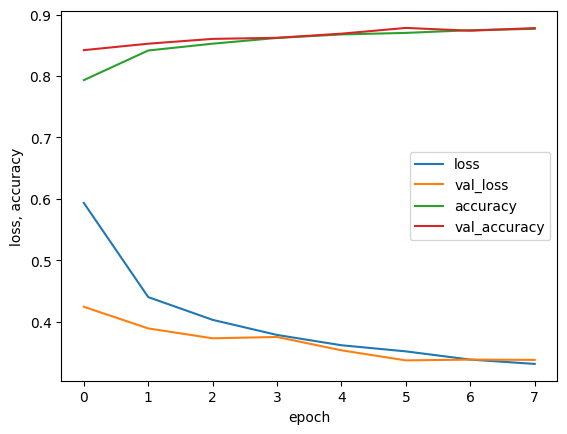

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8793 - loss: 0.3364


[0.33720463514328003, 0.878250002861023]

In [63]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss, accuracy')
plt.legend(['loss', 'val_loss','accuracy', 'val_accuracy'])
plt.show()
model.evaluate(val_scaled, val_target) # 검증세트의 성능 확인 (32.49%, 88.09%) 에포크 10번
# 컴퓨터의 자원과 시간을 아끼고 콜백과 함꼐 사용하면 최상의 모델을 자동으로 저장해 준다는 것을 명심